# Laboration deep learning

## 0. EDA och filhantering

### a)

### b)

In [40]:
from pathlib import Path
import numpy as np
import os

current_path = Path().absolute()
print(f"{current_path = }")

current_path = WindowsPath('y:/Skola/OOP/Skolarbete/AI-Erik-Johansson-OPA23/lab2')


In [41]:
import matplotlib.pyplot as plt

data_path = current_path / "original_data" / "train" / "train"

image_paths = [f for f in os.listdir(data_path)]

# https://stackoverflow.com/questions/49280966/pulling-random-files-out-of-a-folder-for-sampling

images_random = [(plt.imread(data_path / i), i) for i in (np.random.choice(image_paths, 10))]

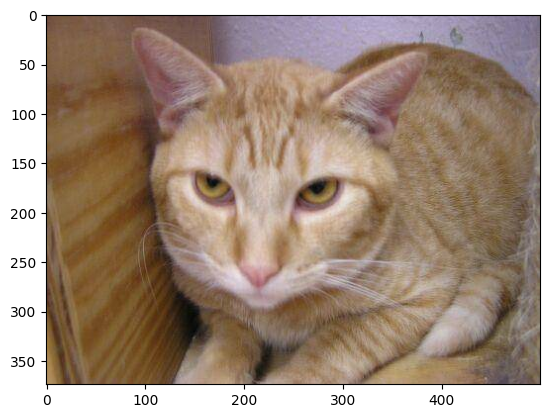

In [42]:
plt.imshow(images_random[0][0])

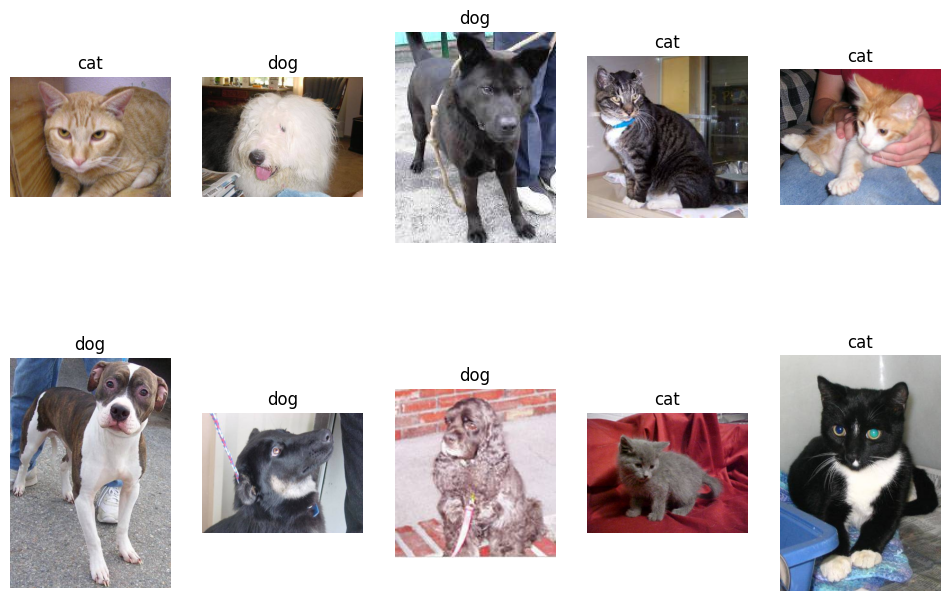

In [43]:
import matplotlib.pyplot as plt

labels = ["dog", "cat"]

fig, axes = plt.subplots(2,5, figsize=(12,8))

for ax, image in zip(axes.flatten(), images_random):
    ax.imshow(image[0])
    # https://stackoverflow.com/questions/47684802/to-check-if-filename-has-substring-of-a-word-in-a-list
    for label in labels:
        if label in image[1]:
            ax.set_title(f"{label}")
    ax.axis("off")

### c)

In [44]:
for size in ("small", "tiny"):
    newdir = current_path / f"experiment_{size}_data"
    if not os.path.exists(newdir):
        os.makedirs(newdir)
    for split in ("test", "train", "val"):
        splitdir = newdir / split
        if not os.path.exists(splitdir):
            os.makedirs(splitdir)


### d)

In [45]:
cat_paths = [str(path) for path in data_path.glob("*.jpg")][:12500]
dog_paths = [str(path) for path in data_path.glob("*.jpg")][12500:]
cat_paths[12499], dog_paths[12499]

IndexError: list index out of range

In [ ]:
cat_small = np.random.choice(cat_paths, 1250, replace=False)
dog_small = np.random.choice(dog_paths, 1250, replace=False)
len(cat_small), len(dog_small)

(1250, 1250)

In [ ]:
len(cat_small)

1250

In [ ]:
from itertools import islice
# https://www.geeksforgeeks.org/python-split-list-in-uneven-groups/
test_sizes = [250, 800, 200]

temp = iter(cat_small)
cat_split = [list(islice(temp, 0, ele)) for ele in test_sizes]

len(cat_split[1])

800

In [ ]:
temp = iter(dog_small)
dog_split = [list(islice(temp, 0, ele)) for ele in test_sizes]

len(dog_split[2])

200

In [ ]:
for cat in cat_split:
    print(len(cat))

250
800
200


In [ ]:
import shutil
# https://stackoverflow.com/questions/123198/how-to-copy-files

dirs = ("test", "train", "val")
#for dir, splits in zip(dirs, cat_split):
    #for path in splits:
        #shutil.copy2(path, current_path / "experiment_small_data" / dir)

#for dir, splits in zip(dirs, dog_split):
    #for path in splits:
        #shutil.copy2(path, current_path / "experiment_small_data" / dir)
    

### e)

In [ ]:
data_path = current_path / "experiment_small_data" / "test"
test_paths = [str(path) for path in data_path.glob("*.jpg")]
np.random.seed(42)
np.random.shuffle(test_paths)
len(test_paths)

500

In [ ]:
data_path = current_path / "experiment_small_data" / "train"
train_paths = [str(path) for path in data_path.glob("*.jpg")]
np.random.shuffle(train_paths)
len(train_paths)

1600

In [ ]:
data_path = current_path / "experiment_small_data" / "val"
val_paths = [str(path) for path in data_path.glob("*.jpg")]
np.random.shuffle(val_paths)
len(val_paths)

400

In [ ]:
y_test = np.array([int("dog" in path) for path in test_paths])
y_train = np.array([int("dog" in path) for path in train_paths])
y_val = np.array([int("dog" in path) for path in val_paths])
len(y_test), len(y_train), len(y_val)

(500, 1600, 400)

In [ ]:
image_test = [plt.imread(path) for path in test_paths[:10]]
image_labels = y_test[:10]
len(image_test), len(image_labels)

(10, 10)

<bound method Figure.tight_layout of <Figure size 1200x800 with 10 Axes>>

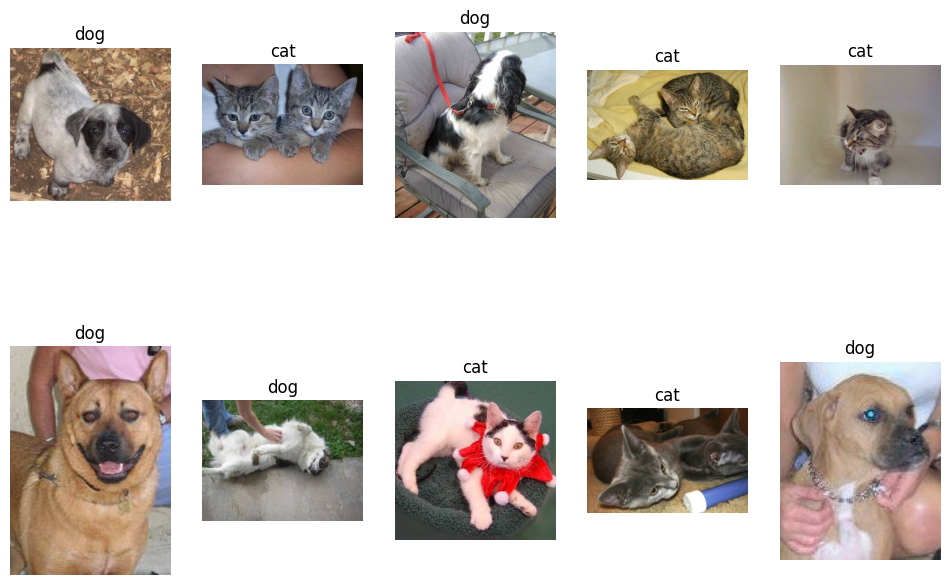

In [ ]:
labels = ["cat", "dog"]

fig, axes = plt.subplots(2,5, figsize=(12,8))
for i , ax in enumerate(axes.flatten()):
    ax.imshow(image_test[i])
    ax.axis("off")
    ax.set_title(labels[image_labels[i]])

fig.tight_layout

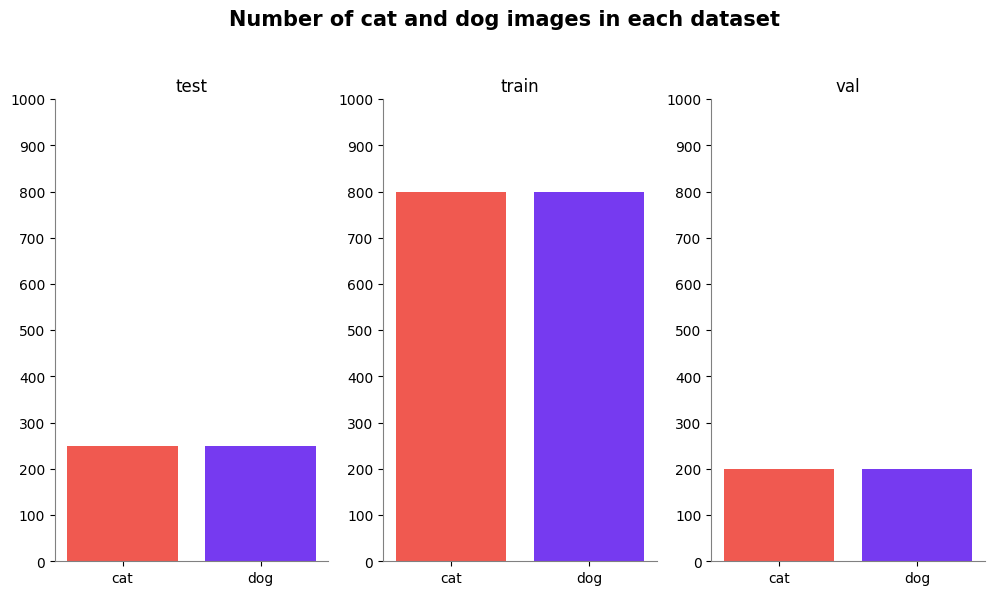

In [ ]:
dirs = ("test", "train", "val")

fig, axes = plt.subplots(1, 3, figsize=(12, 6))
for dir, ax in zip(dirs, axes):
    x = ["cat", "dog"]
    ax.set_title(dir)
    if dir == "test":
        y = [np.count_nonzero(y_test == i) for i in range(2)]
    elif dir == "train":
        y = [np.count_nonzero(y_train == i) for i in range(2)]
    elif dir == "val":
        y = [np.count_nonzero(y_val == i) for i in range(2)]
    ax.bar(x, y, color=["#F05950", "#763AF0"])
    ax.set_yticks(range(0, 1001, 100))
    ax.spines[["top", "right"]].set_visible(False)
    ax.spines[["bottom", "left"]].set_color("GRAY")

    fig.suptitle(
        "Number of cat and dog images in each dataset",
        y=1.03,
        fontweight="bold",
        fontsize=15,
    )

In [ ]:
y_train[:20]

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0])

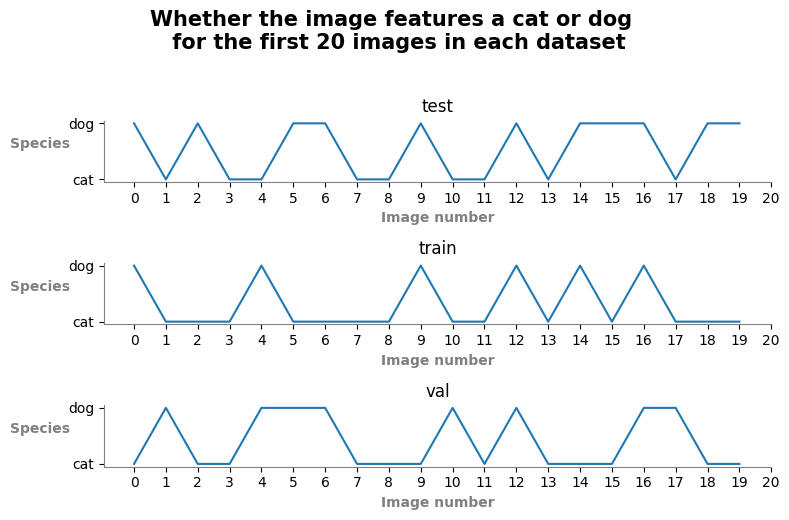

In [ ]:
dirs = ("test", "train", "val")

fig, axes = plt.subplots(3, 1, figsize=(8, 5))
for dir, ax in zip(dirs, axes):
    x = range(20)
    ax.set_title(dir)
    if dir == "test":
        y = y_test[:20]
    elif dir == "train":
        y = y_train[:20]
    elif dir == "val":
        y = y_val[:20]
    ax.plot(x, y)
    ax.set_yticks(ticks=range(0, 2), labels=("cat", "dog"))
    ax.set_xticks(ticks=range(0, 21, 1))
    ax.spines[["top", "right"]].set_visible(False)
    ax.spines[["bottom", "left"]].set_color("GRAY")
    ax.set_xlabel("Image number", color="GRAY", fontweight="bold")
    ax.set_ylabel("Species", rotation=0, labelpad=20, color="GRAY", fontweight="bold")

    fig.suptitle(
        "Whether the image features a cat or dog \n for the first 20 images in each dataset",
        y=1.03,
        fontweight="bold",
        fontsize=15,
    )

fig.tight_layout()

## 1. Bildbehandling

### a)

In [ ]:
train_images = [plt.imread(path) for path in train_paths]
len(train_images)

1600

In [47]:
heights = [image.shape[0] for image in train_images]
widths = [image.shape[1] for image in train_images]
heights[:5], widths[:5]

([371, 253, 443, 256, 375], [447, 166, 500, 360, 499])

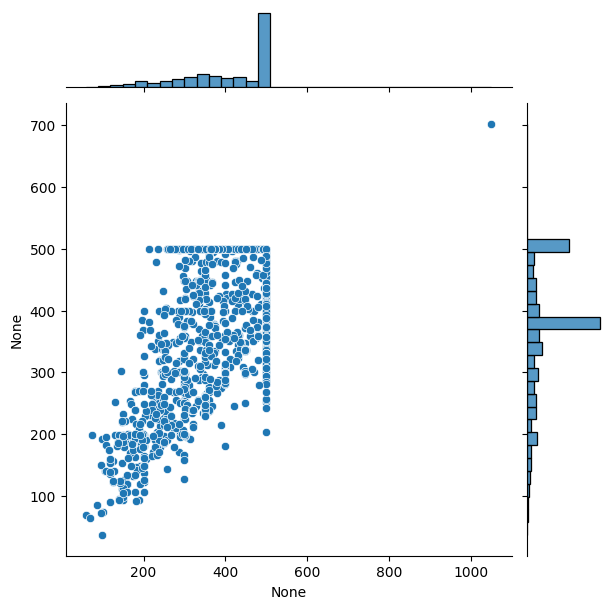

In [ ]:
import seaborn as sns 

sns.jointplot(x=widths, y=heights)

### b)

Såg snabbt över bilderna och bytte manuellt ut ett par som inte föreställde varken en hund eller katt (dog.8898, dog.4367)

In [51]:
# Check how many images has a height and/or width that's smaller than 100px
res_too_small = []
for idx in range(0, len(heights)) :
    if heights[idx] < 100 or widths[idx] < 100:
        res_too_small.append(idx)

len(res_too_small), res_too_small[:5]

(16, [141, 189, 330, 361, 416])

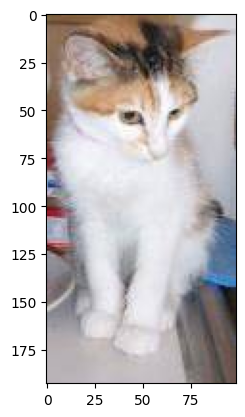

In [53]:
# Example image with subpar resolution
plt.imshow(train_images[141])

In [55]:
# Check how many images that has a height of 1.75 or more times its width and vice versa
res_bad_ratio = []
for idx in range(0, len(heights)) :
    if heights[idx] > 2*widths[idx] or widths[idx] > 1.75*heights[idx]:
        res_bad_ratio.append(idx)

len(res_bad_ratio), res_bad_ratio[:5]

(26, [26, 38, 188, 298, 361])

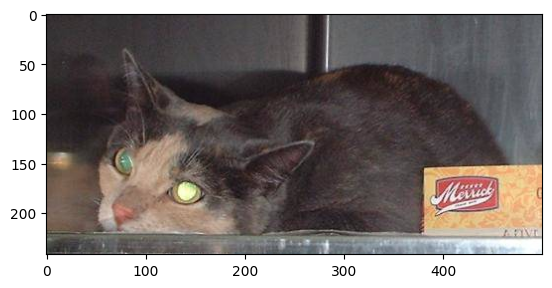

In [52]:
# Example image with subpar aspect ratio
plt.imshow(train_images[298])

In [60]:
# Check how many of the images are taller, wider or have the same ratio
taller, wider, same = 0, 0, 0
for idx in range(0, len(heights)) :
    if heights[idx] > widths[idx]:
        taller += 1
    elif widths[idx] > heights[idx]:
        wider += 1
    else:
        same +=1

taller, wider, same

(546, 1049, 5)

In [ ]:
# Check average height and width
np.average(heights), np.average(widths)

(363.1575, 399.710625)

In [57]:
# Check most common height and width
for w in (heights, widths):
    unique, counts = np.unique(w, return_counts=True)
    print(unique[np.argmax(counts)])

374
499


### En lämplig bildstorlek verkar vara ca 400x450 eftersom det är runt den storleken de flesta bilderna är och att det är fler

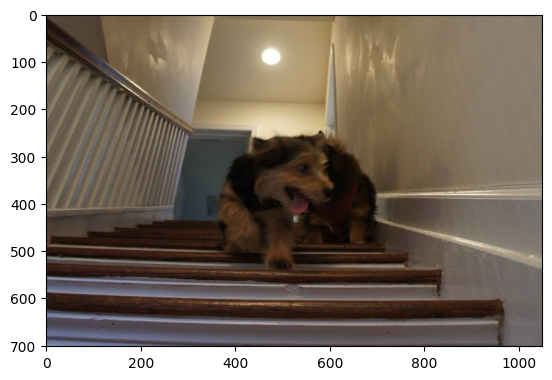